In [43]:
from langgraph.graph import StateGraph , START , END

from typing import TypedDict, Annotated
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import BaseMessage ,HumanMessage , AIMessage ,SystemMessage
from langgraph.graph.message import add_messages
import os
from dotenv import load_dotenv
load_dotenv()

from langgraph.checkpoint.memory import MemorySaver

In [26]:
LLM = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  
    google_api_key=os.getenv('GOOGLE_API_KEY') )

In [27]:
class Chatstate(TypedDict):
    messages :Annotated[list[BaseMessage],add_messages]

In [39]:
# creating the chat_node
def chat_node(state: Chatstate) -> Chatstate:
    messages = state["messages"]
    
    # Prepend system message to all conversations
    system_message = SystemMessage(content="You are a helpful assistant that provides answers only")
    messages_with_system = [system_message] + messages
    
    response = LLM.invoke(messages_with_system)
    
    return {'messages': [response]}


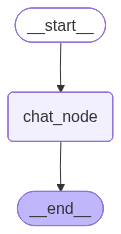

In [44]:

#checkpointer = MemorySaver()

graph = StateGraph(Chatstate)

graph.add_node("chat_node",chat_node)

graph.add_edge(START,"chat_node")
graph.add_edge("chat_node",END)


chatbot_without_memory = graph.compile()
chatbot_without_memory

In [45]:
user_input = "Hello what is Love?"


response = chatbot_without_memory.invoke({"messages": [HumanMessage(content=user_input)]})
print(response['messages'][-1].content)

Love is a profound and multifaceted emotion characterized by deep affection, care, and a strong desire for the well-being and happiness of another person, a group, or even an object or idea.

It manifests in various forms, such as:
*   **Romantic love:** Characterized by passion, intimacy, and commitment.
*   **Familial love:** The bond between family members, often involving loyalty and unconditional support.
*   **Platonic love:** Deep affection and care between friends, without romantic or sexual elements.
*   **Self-love:** Respect and appreciation for oneself.
*   **Love for humanity/ideas:** A broader sense of compassion or dedication to a cause.

Often, love involves feelings of attachment, intimacy, trust, empathy, and a willingness to support, protect, and sacrifice. While universally experienced, its meaning and expression can be deeply personal and evolve over time.


In [ ]:
# keeping the Conversation chain

while True:

    user_message = input("Type Here.....")
    print("User:",user_message)

    if user_message.strip().lower() in ['exit','bye','quit','disconnect']:
        break

    response = chatbot_without_memory.invoke({'messages':[HumanMessage(content=user_message)]})
    print("AI:",response['messages'][-1].content)

User: Whats up?
AI: Not much.
User: Lets party??
AI: Let's!
User: suggest a good place in kolkata?
AI: Victoria Memorial.
User: victoria Memorial for party hell no i want to partty in kolkata
AI: Okay, so no party at Victoria Memorial. You want to party in Kolkata!
User: Yes tell me where i can party in kolkata?
AI: Here are some popular places to party in Kolkata:

*   **Roxy, The Park Hotel:** (Nightclub)
*   **Pour House:** (Pub)
*   **Monkey Bar:** (Bar/Lounge)
*   **Shisha Bar Stock Exchange:** (Pub/Bar)
*   **Someplace Else, The Park Hotel:** (Pub with live music)
*   **Titos:** (Pub/Bar)
*   **Ozora:** (Rooftop bar/lounge)
*   **Raasta:** (Pub/Bar)
User: Give me directions for pour house?
AI: To give you accurate directions, I need to know which "Pour House" you're referring to, as there are many locations across different cities.

Please specify the **city and state** of the Pour House you want directions to.
User: I am asking about Pour house in kolkata
AI: I couldn't find any

# everytime you invoke state sterts from scratch no information is saved


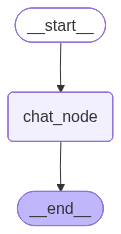

In [46]:
# use of Persistence

# creating a new flow


checkpointer = MemorySaver()

graph = StateGraph(Chatstate)

graph.add_node("chat_node",chat_node)

graph.add_edge(START,"chat_node")
graph.add_edge("chat_node",END)


chatbot_with_memory = graph.compile(checkpointer=checkpointer) # saving in RAM
chatbot_with_memory


In [ ]:
# keeping the Conversation chain
thread_id = "1"

while True:

    user_message = input("Type Here.....")
    print("User:",user_message)

    if user_message.strip().lower() in ['exit','bye','quit','disconnect','okay']:
        break
    
    config ={'configurable':{'thread_id':thread_id}}
    response = chatbot_with_memory.invoke({'messages':[HumanMessage(content=user_message)]},config = config)
    print("AI:",response['messages'][-1].content)

User: Hello My name Is drigger
AI: Hello Drigger, how can I help you today?
User: whats my name?
AI: Your name is Drigger.
User: wana party in kolkata?
AI: As an AI, I can't physically go to parties or travel to Kolkata. My purpose is to provide information and complete tasks here in our conversation.

However, if you're looking for information about parties or things to do in Kolkata, I'd be happy to help with that!
User: Tell me the best place to party in this city?
AI: Kolkata has a vibrant nightlife with a variety of options depending on what kind of party you're looking for! "Best" can be subjective, but here are some of the most popular and highly-rated places known for their atmosphere, music, and drinks:

**For Dancing & High-Energy Clubs:**

1.  **Tantra (The Park Hotel):** One of Kolkata's oldest and most iconic nightclubs. Known for its spacious dance floor, great music (often commercial, Bollywood, and EDM), and a sophisticated crowd.
2.  **Roxy (The Park Hotel):** Also loc